In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
all_counts = pd.read_csv('all_count_matrix.tsv', sep="\t", index_col=False)
avg_counts = pd.read_csv('avg_count_matrix.tsv',  sep="\t", index_col=False)
diff_counts = pd.read_csv('diff_count_matrix.tsv', sep="\t", index_col=False)
meta = pd.read_csv('complete_meta_data.tsv', sep="\t", index_col=False)
rownames = pd.read_csv('rownames.tsv', sep="\t", index_col=False)
meta_transpose = meta.set_index("id").T

In [20]:
all_counts.head()

,ENCFF302TQO,ENCFF413BXV,ENCFF996YFF,ENCFF421TRR,ENCFF070GIC,ENCFF097IDM,ENCFF929KWG,ENCFF672DDJ,ENCFF127FPD,ENCFF721XZC,...,ENCFF385MJV,ENCFF923YGS,ENCFF517XLT,ENCFF434XNZ,ENCFF485CJB,ENCFF795XBQ,ENCFF905HUL,ENCFF783LVC,ENCFF465YOS,ENCFF516EUX
0,175.06,172.34,178.65,173.04,169.59,141.95,164.00,162.70,108.99,90.14,...,102.81,86.01,95.80,92.25,81.23,79.93,121.14,107.33,66.87,100.92
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,70.18,72.38,55.97,64.14,60.95,43.58,61.54,63.73,47.95,42.42,...,9.58,6.80,8.63,7.54,7.09,7.44,20.58,16.07,7.10,12.98
3,3.29,2.63,2.51,1.86,2.15,1.60,2.71,3.11,2.34,2.17,...,1.49,0.82,0.94,0.75,0.40,0.46,1.82,1.62,1.11,1.13
4,0.00,0.00,0.00,0.05,0.19,0.00,0.14,0.00,0.30,0.17,...,3.63,0.87,2.86,5.97,0.61,0.74,0.93,0.35,64.26,51.01


In [21]:
all_counts.shape
avg_counts.shape
diff_counts.shape

(21293, 78)

In [22]:
all_counts.dtypes
avg_counts.dtypes
diff_counts.dtypes

ENCFF302TQO    float64
ENCFF996YFF    float64
ENCFF070GIC    float64
ENCFF929KWG    float64
ENCFF127FPD    float64
                ...   
ENCFF385MJV    float64
ENCFF517XLT    float64
ENCFF485CJB    float64
ENCFF905HUL    float64
ENCFF465YOS    float64
Length: 78, dtype: object

In [23]:
forebrain = avg_counts.filter(meta[meta.tissue_type == "forebrain"].id)
forebrain = forebrain.rename({id:meta_transpose[id]["dev_stage"] for id in list(forebrain.columns)},axis=1)
forebrain = forebrain.rename(rownames.iloc[:,0])
#Drop if all rows smaller than 100
forebrain

,E10.5,E11.5,E12.5,E13.5,E14.5,E15.5,E16.5,P0
Gnai3,173.700,167.155,165.840,146.635,138.460,138.025,145.555,94.455
Pbsn,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Cdc45,71.280,62.115,46.385,41.230,27.170,21.500,18.810,4.955
Scml2,2.960,4.220,3.410,2.275,2.645,2.110,2.010,1.140
Apoh,0.000,0.000,0.090,0.830,0.080,0.595,0.130,0.210
...,...,...,...,...,...,...,...,...
Wdr49,0.000,0.000,0.025,0.000,0.010,0.000,0.015,0.080
Pcdha7,0.100,0.400,1.320,2.260,3.710,5.295,6.895,8.565
Pcdhga3,2.095,3.525,5.395,4.760,6.505,6.455,8.260,8.715
A030005K14Rik,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


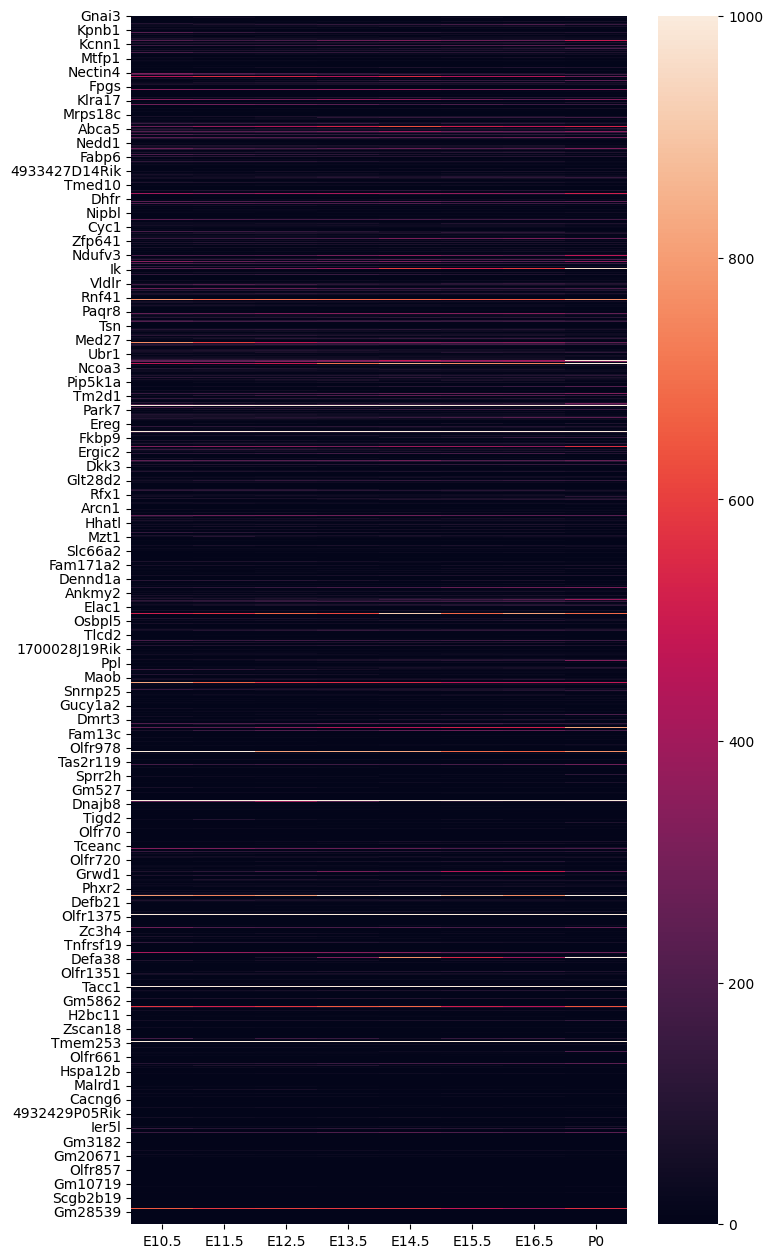

In [24]:
%matplotlib inline
forebrain.rename
plt.figure(figsize=(8,16), dpi=100)
sns.heatmap(data=forebrain, vmax=1000)
plt.show()

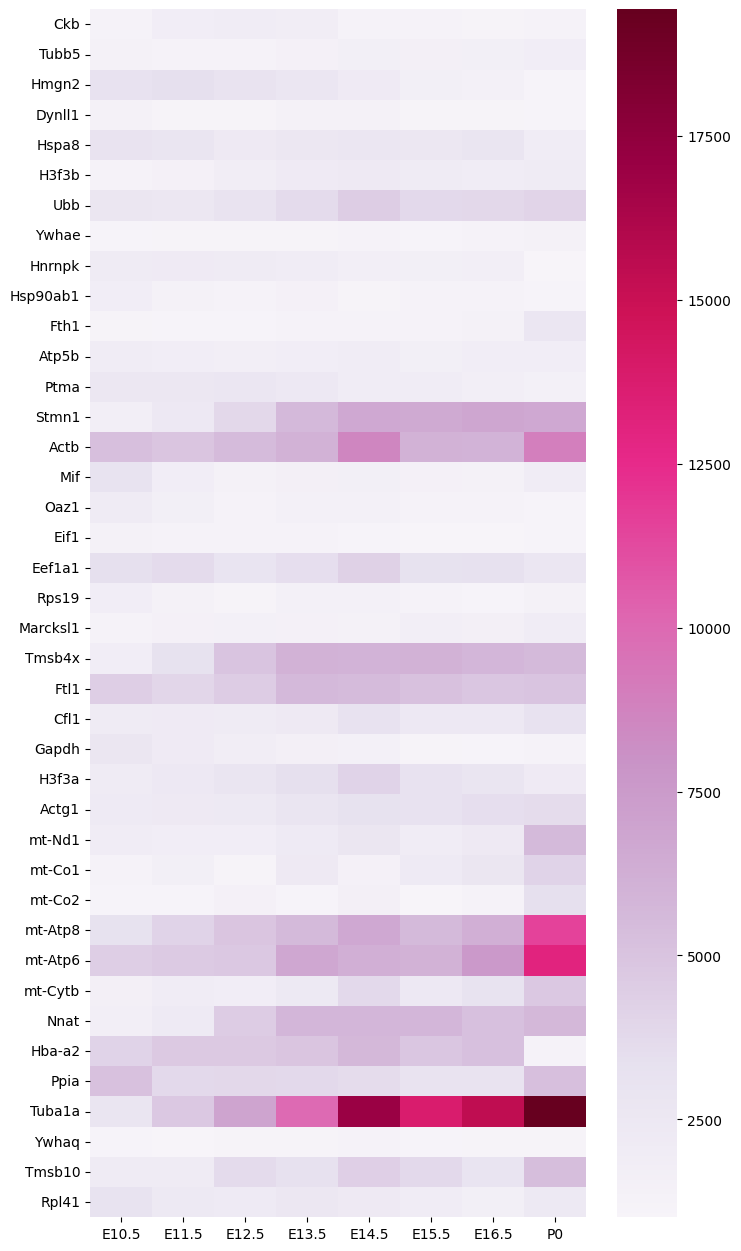

In [25]:
%matplotlib inline
forebrain.rename
plt.figure(figsize=(8,16), dpi=100)
sns.heatmap(data=forebrain.loc[(forebrain > 1000).all(axis=1)], cmap='PuRd')
plt.show()


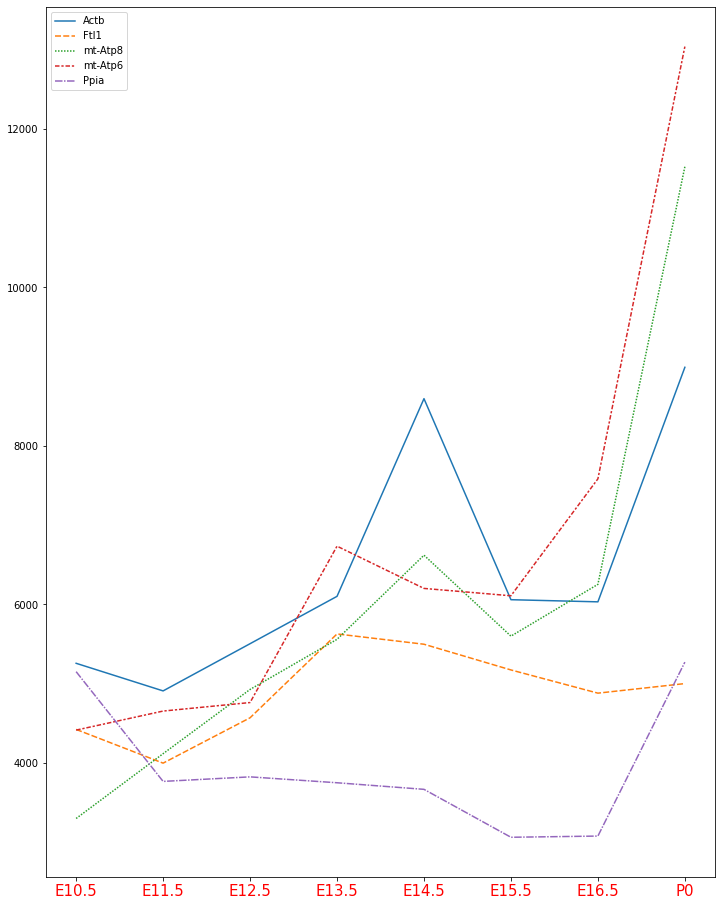

In [26]:
plt.figure(figsize=(12,16))
g= sns.lineplot(data=forebrain.loc[(forebrain > 3000).all(axis=1)].T)
for tick in g.axes.get_xticklabels():
    tick.set_color("red")
    tick.set_fontsize("15")
plt.show()

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale
scale_data = scale(forebrain.T)
pca = PCA()
pca.fit(scale_data)
pca_data = pca.transform(scale_data)

In [33]:
pca_data

array([[-134.69298495,   77.03424154],
       [-105.82964324,   19.36711735],
       [ -72.0737866 ,  -30.89872558],
       [ -13.42443492,  -34.58765748],
       [  46.33248851,  -20.87520946],
       [  52.33751721,  -56.89416716],
       [  67.95859992,  -67.92850673],
       [ 159.39224408,  114.78290752]])

In [29]:
#sns.scatterplot(data=pca_fore_brain)

In [30]:
len(pca_fore_brain[0])

21293